# E1: Exploratory data analysis
### Enrique Ruiz Ruiz

---
## Assignment goal
---



The goal of this assignment is to perform an exploratory data analysis of a simple dataset. To this end, create a notebook, load a dataset of your interest and apply techniques developed in along the lecture (summary statistics and/or graphical tools).

Remember that the goal of an exploratory analysis is not to provide a definitive answer to a question, but rather to get an insight to the data to better frame futher analysis. In other words, we want to describe our data instead of reaching solid conclusions.

You may want to consider the following structure to guide your EDA.

*   First contact
  *   Visualize your raw data.
  *   Count number of instances and attributes (rows and columns).
  *   Identify your variables.
  *   Find out if there are duplicates and NaNs and handle them.
  *   Get summary statistics (max, min, avg) and identify whether there are outlayers.
*   Visualize your variables distribution (univariable).
*   Identify correlations among your variables (bivariable).

---
## Preprocessing
---



In [7]:
# Imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Using seaborn we can gather relevant data from the ***planets*** dataset.


In [56]:
# Load the dataset of exoplantes
df_planets = sns.load_dataset('planets');

# 1035 rows × 6 columns
# [method - number - orbital_period - mass - distance - year]

#Get some info of the varibles
method_types = df_planets['method'].unique();

# Decomment the next line to previsualice the data set
# df_planets


Count number of instances and attributes (rows and columns).
*   1035 rows × 6 columns

Identify the variables.
*    method (string)
    *   'Radial Velocity'
    *   'Imaging'
    *   'Eclipse Timing Variations'
    *   'Transit'
    *   'Astrometry'
    *   'Transit Timing Variations'
    *   'Orbital Brightness Modulation'
    *   'Microlensing'
    *   'Pulsar Timing'
    *   'Pulsation Timing Variations
*    number (int)
*    orbital_period (float)
*    mass (float)
*    distance (float)
*    year (date)

We have to clean and preprocess data following steps like:
  * Handle missing values (remove, fill, or interpolate).
  * Remove duplicates and irrelevant features.

In [60]:
# 1. Remove NaN data
df_planets_clean = df_planets.dropna()

# 2. Remove duplicates
df_planets_clean = df_planets_clean.drop_duplicates()

# After clean the data we have
# 498 rows × 6 columns
# [method - number - orbital_period - mass - distance - year]

# Decomment the next line to previsualice the data set
# df_planets_clean

There are a lot of duplicates now, the data set has 498 rows instead of 1035.

In [61]:
# Get summary statistics (max, min, avg) and identify whether there are outlayers.

# Init summary list
summary = []

# Loop through the df numeric columns to get the max, min and avg values
for column in df_planets_clean.select_dtypes(include=['number']).columns:
    # Append the summary information (Max, Min, Avg) for each numeric column to the list
    summary.append({
        "Column Name": column,
        "Max": round(df_planets_clean[column].max(), 2),  # Round max value to 2 decimals
        "Min": round(df_planets_clean[column].min(), 2),  # Round min value to 2 decimals
        "Avg": round(df_planets_clean[column].mean(), 2)  # Round avg value to 2 decimals
    })

# Create a new DataFrame from the summary list
df_summary = pd.DataFrame(summary)

# Decomment the next line to previsualice the summary DataFrame
# df_summary


---
## Visualization
---

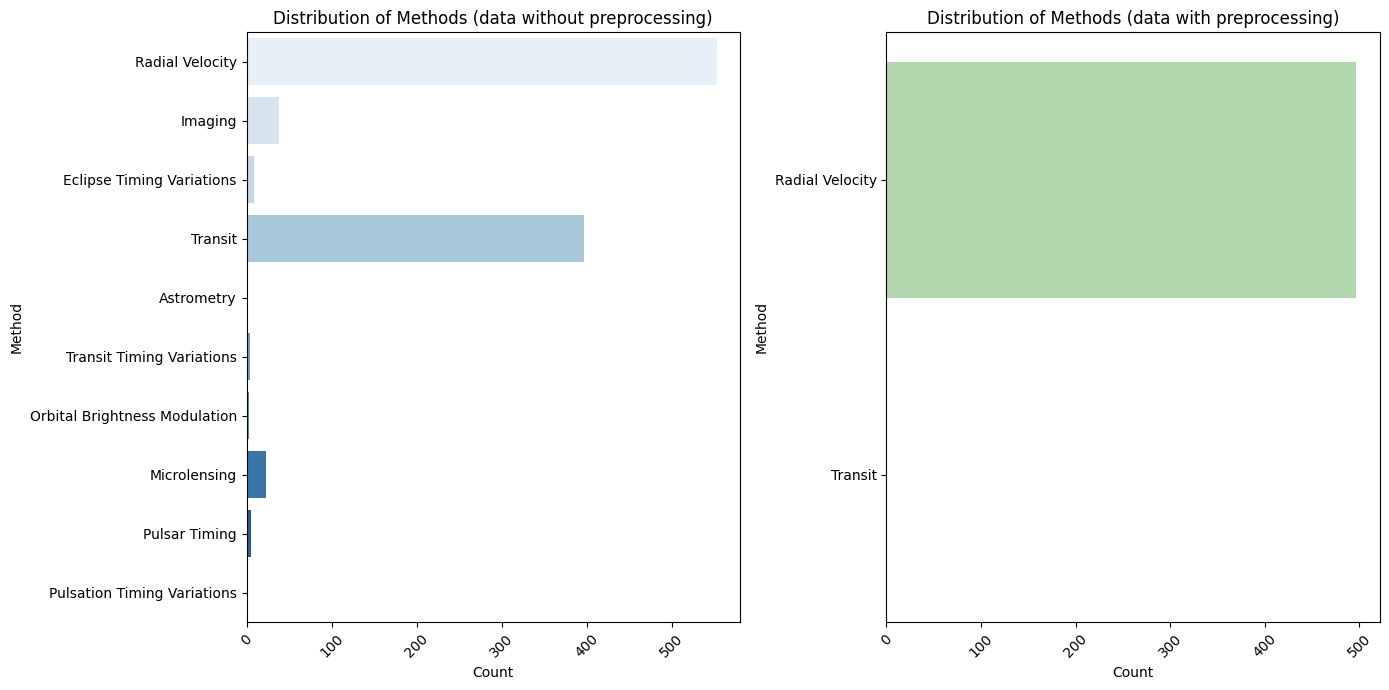

In [78]:
# METHOD

# Create a figure and axes to combine both plots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for df_planets with a custom color palette
sns.countplot(y='method', hue='method', data=df_planets, ax=axes[0], palette='Blues')
axes[0].set_title('Distribution of Methods (data without preprocessing)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Method')
axes[0].tick_params(axis='x', rotation=45)

# Plot for df_planets_clean with a different custom color palette
sns.countplot(y='method', hue='method', data=df_planets_clean, ax=axes[1], palette='Greens')
axes[1].set_title('Distribution of Methods (data with preprocessing)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Method')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

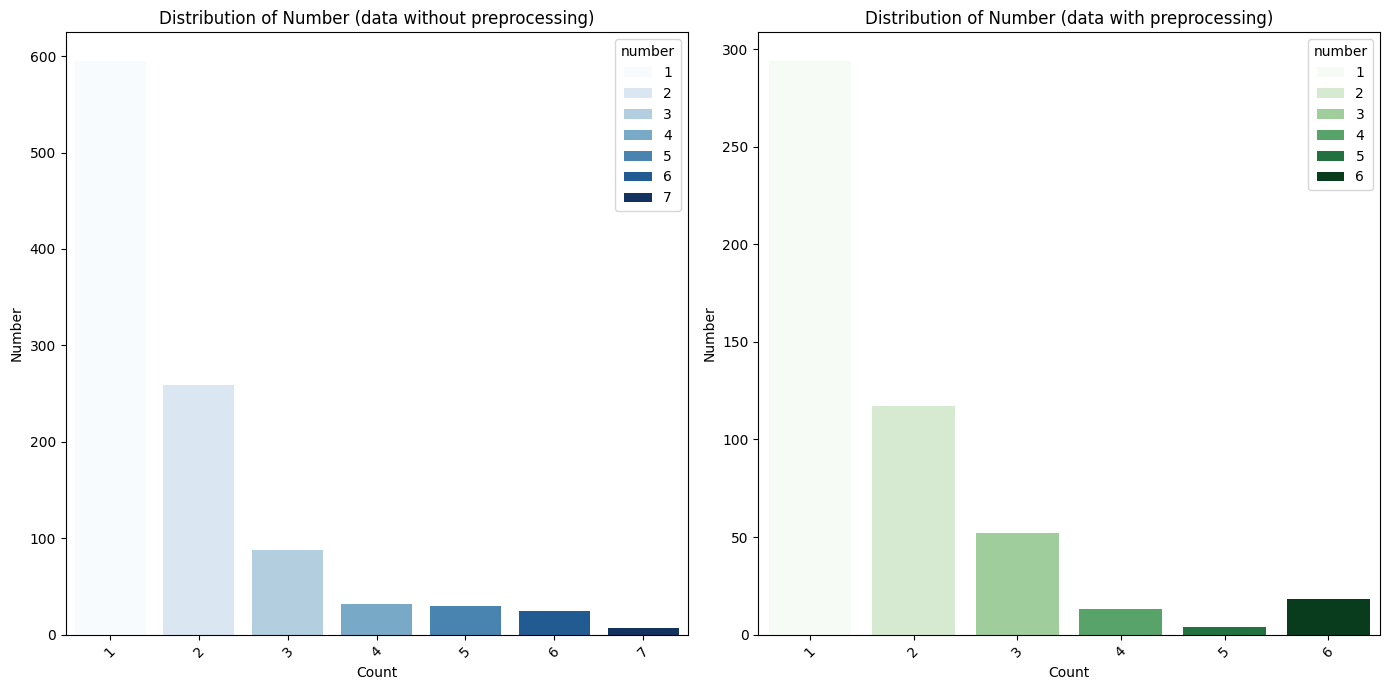

In [82]:
# Number

# Create a figure and axes to combine both plots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for df_planets
sns.countplot(x='number', hue='number', data=df_planets, ax=axes[0], palette='Blues')
axes[0].set_title('Distribution of Number (data without preprocessing)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Number')
axes[0].tick_params(axis='x', rotation=45)

# Plot for df_planets_clean
sns.countplot(x='number', hue='number', data=df_planets_clean, ax=axes[1], palette='Greens')
axes[1].set_title('Distribution of Number (data with preprocessing)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Number')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

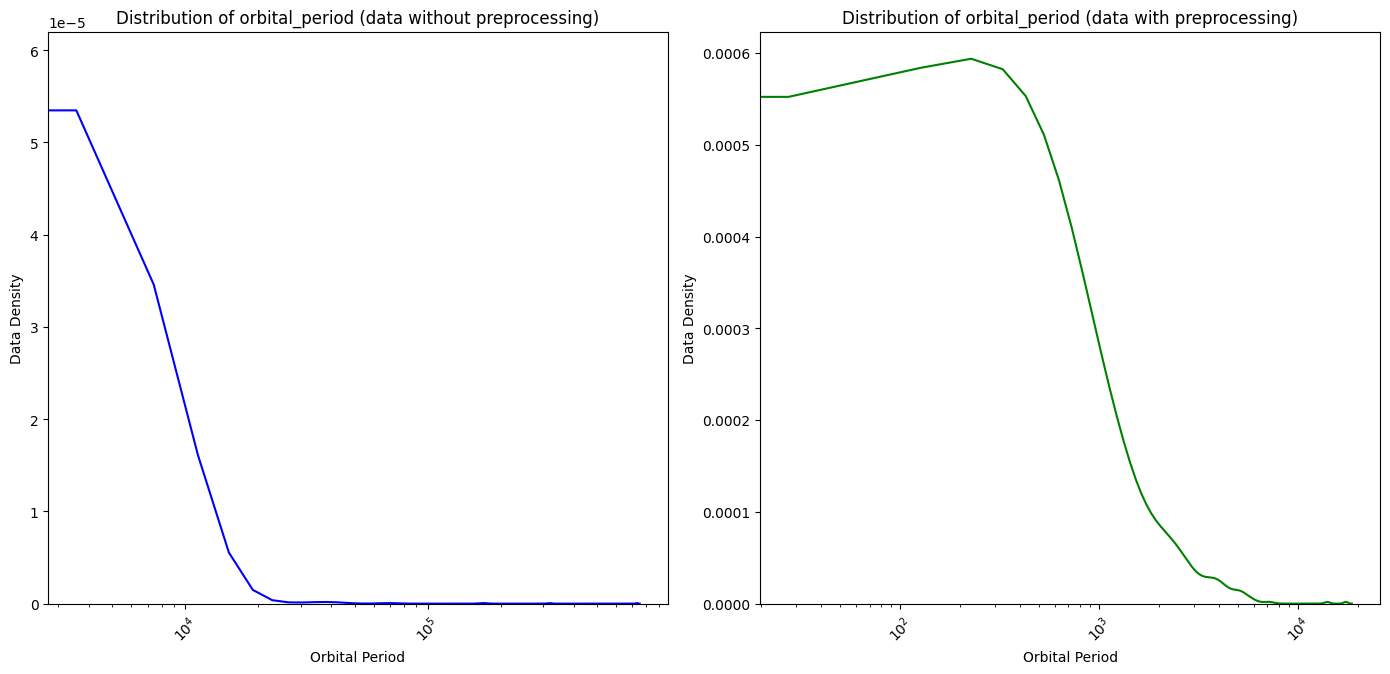

In [98]:
# Orbital period

# Create a figure and axes to combine both plots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for df_planets
sns.kdeplot(x='orbital_period', data=df_planets, ax=axes[0], color='Blue')
axes[0].set_title('Distribution of orbital_period (data without preprocessing)')
axes[0].set_ylabel('Data Density')
axes[0].set_xlabel('Orbital Period')
axes[0].tick_params(axis='x', rotation=45)

# Plot for df_planets_clean
sns.kdeplot(x='orbital_period', data=df_planets_clean, ax=axes[1], color='Green')
axes[1].set_title('Distribution of orbital_period (data with preprocessing)')
axes[1].set_ylabel('Data Density')
axes[1].set_xlabel('Orbital Period')
axes[1].tick_params(axis='x', rotation=45)

# change the visualization to a logarithmic scale
axes[0].set_xscale('log')
axes[1].set_xscale('log')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

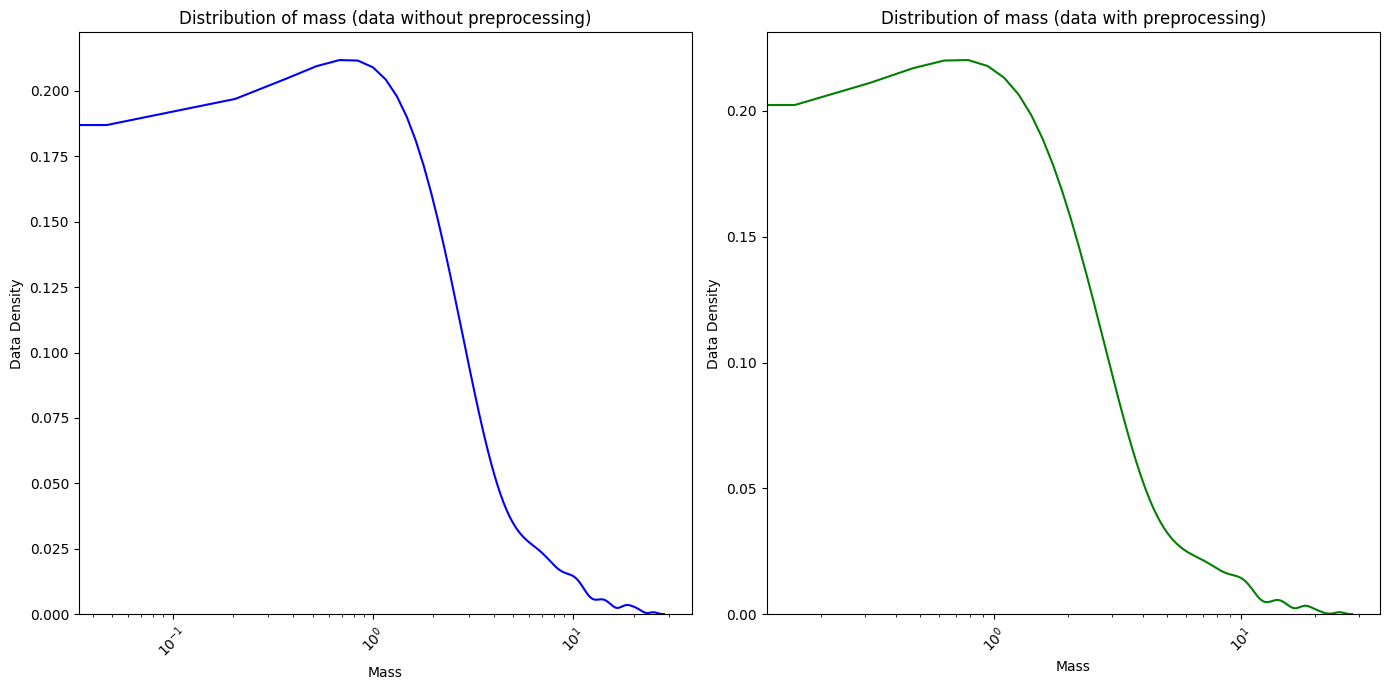

In [100]:
# Mass

# Create a figure and axes to combine both plots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for df_planets
sns.kdeplot(x='mass', data=df_planets, ax=axes[0], color='Blue')
axes[0].set_title('Distribution of mass (data without preprocessing)')
axes[0].set_ylabel('Data Density')
axes[0].set_xlabel('Mass')
axes[0].tick_params(axis='x', rotation=45)

# Plot for df_planets_clean
sns.kdeplot(x='mass', data=df_planets_clean, ax=axes[1], color='Green')
axes[1].set_title('Distribution of mass (data with preprocessing)')
axes[1].set_ylabel('Data Density')
axes[1].set_xlabel('Mass')
axes[1].tick_params(axis='x', rotation=45)

# change the visualization a logarithmic way
axes[0].set_xscale('log')
axes[1].set_xscale('log')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

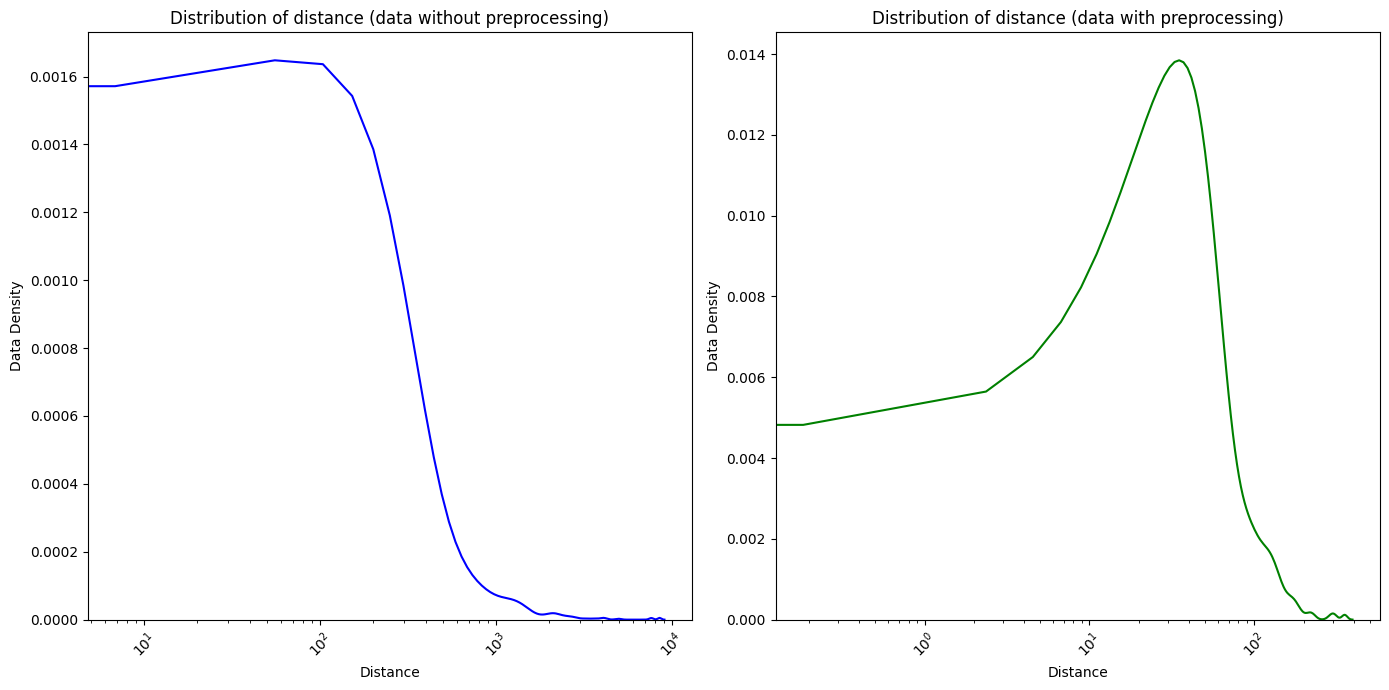

In [101]:
# Distance

# Create a figure and axes to combine both plots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for df_planets
sns.kdeplot(x='distance', data=df_planets, ax=axes[0], color='Blue')
axes[0].set_title('Distribution of distance (data without preprocessing)')
axes[0].set_ylabel('Data Density')
axes[0].set_xlabel('Distance')
axes[0].tick_params(axis='x', rotation=45)

# Plot for df_planets_clean
sns.kdeplot(x='distance', data=df_planets_clean, ax=axes[1], color='Green')
axes[1].set_title('Distribution of distance (data with preprocessing)')
axes[1].set_ylabel('Data Density')
axes[1].set_xlabel('Distance')
axes[1].tick_params(axis='x', rotation=45)

# change the visualization a logarithmic way
axes[0].set_xscale('log')
axes[1].set_xscale('log')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

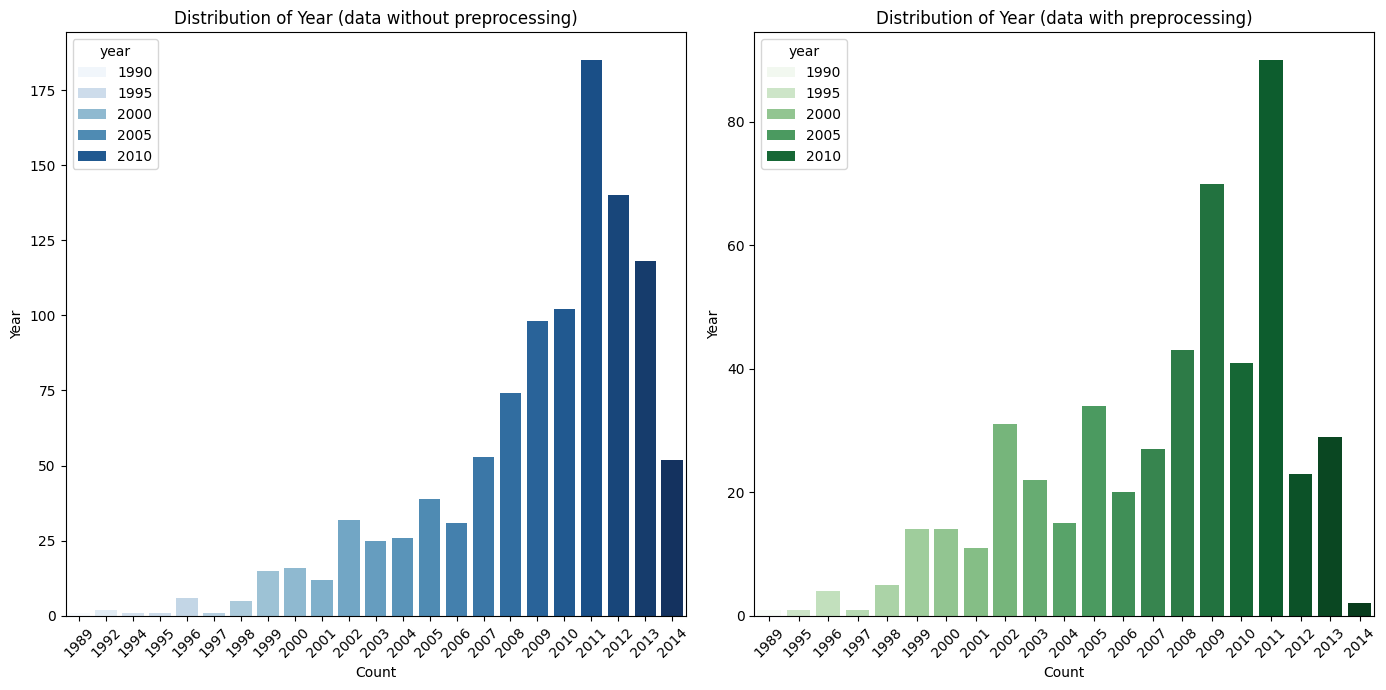

In [102]:
# Year

# Create a figure and axes to combine both plots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for df_planets
sns.countplot(x='year', hue='year', data=df_planets, ax=axes[0], palette='Blues')
axes[0].set_title('Distribution of Year (data without preprocessing)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Year')
axes[0].tick_params(axis='x', rotation=45)

# Plot for df_planets_clean
sns.countplot(x='year', hue='year', data=df_planets_clean, ax=axes[1], palette='Greens')
axes[1].set_title('Distribution of Year (data with preprocessing)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Year')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()